In [ ]:
from src.utils import *
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
import streamlit as st
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
def load_datasets(batch_size):
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

    return train_loader, test_loader


In [ ]:
def train_vgg19_bn(train_loader, test_loader, num_epochs, learning_rate, save_model_path):
    vgg19_bn_model = models.vgg19_bn(num_classes=10)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vgg19_bn_model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(vgg19_bn_model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)
    
    best_accuracy = 0.0

    train_accuracy = []
    train_loss = []
    val_accuracy = []
    val_loss = []

    for epoch in range(num_epochs):
        # Training
        vgg19_bn_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = vgg19_bn_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        # Validation
        vgg19_bn_model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for i, (inputs, labels) in enumerate(test_loader, 0):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = vgg19_bn_model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        val_accuracy.append(accuracy)
        val_loss.append(running_loss / len(test_loader))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(vgg19_bn_model.state_dict(), save_model_path)

    return train_accuracy, train_loss, val_accuracy, val_loss


In [ ]:
def plot_and_save_figure(train_accuracy, train_loss, val_accuracy, val_loss, save_figure_path):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Train Accuracy', color='blue')
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.legend()
    plt.title('Accuracy vs. Epoch')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Train Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.legend()
    plt.title('Loss vs. Epoch')
    
    plt.savefig(save_figure_path)


In [ ]:
batch_size = 64
num_epochs = 40
learning_rate = 0.01
save_model_path = "best_model.pth"
save_figure_path = "path_to_saved_figure.png"

train_loader, test_loader = load_datasets(batch_size)
train_accuracy, train_loss, val_accuracy, val_loss = train_vgg19_bn(train_loader, test_loader, num_epochs, learning_rate, save_model_path)
plot_and_save_figure(train_accuracy, train_loss, val_accuracy, val_loss, save_figure_path)

In [1]:
from src.utils import *
model = Q5_Cifar10(modeTrain=False)
model.load_model("model/best.pth")
model.inference("Dataset_CvDl_Hw1/Q5_image/Q5_4/horse.png")

cpu
61
61


(7,
 [1.0536265330208903e-16,
  2.5624670676547384e-17,
  3.628523046264598e-12,
  1.9517997244464236e-13,
  5.419389708549716e-06,
  2.0400757421157323e-06,
  1.2341834592263223e-18,
  0.9999924898147583,
  5.998958854491026e-19,
  2.4530948714002578e-15])

In [2]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
max_index , probability = model.inference("Dataset_CvDl_Hw1/Q5_image/Q5_4/horse.png") 

In [3]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

In [4]:
label_names[index]

'horse'

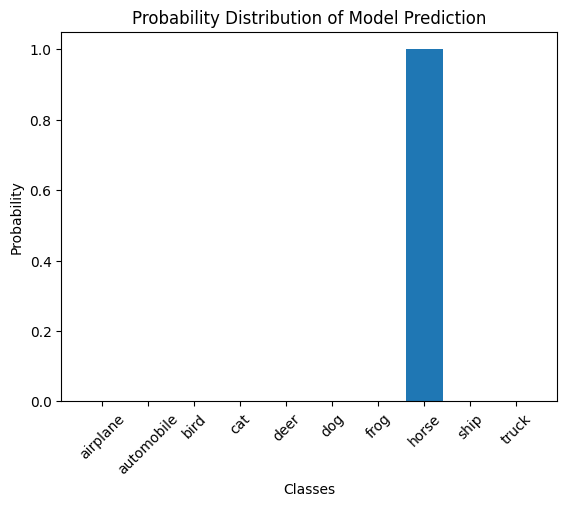

In [6]:
import matplotlib.pyplot as plt
max_index , probability = model.inference("Dataset_CvDl_Hw1/Q5_image/Q5_4/horse.png") 
# Assuming you have the 'label_names' and 'probability' values
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
# Assuming 'probability' is a list of probabilities for each class

# Create a bar plot (histogram) to visualize the probability distribution
plt.bar(label_names, probability)
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Probability Distribution of Model Prediction')
plt.xticks(rotation=45)

plt.show()
